In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Load the dataset
file_path = ('https://raw.githubusercontent.com/UninspiredNomenclature/project_4/refs/heads/main/Resource/winequality-red.csv')
wine_df = pd.read_csv(file_path)

# Display the first few rows to confirm data is loaded
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


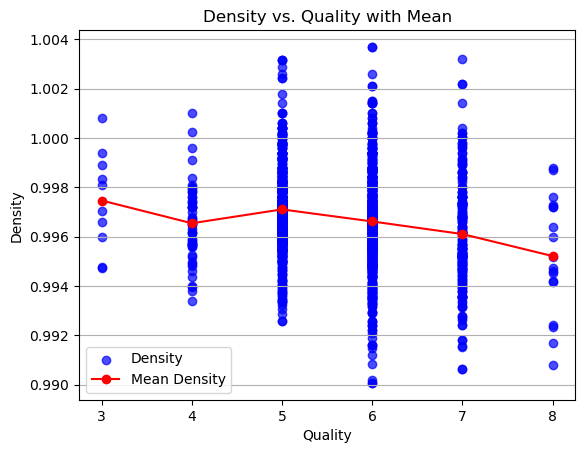

quality
3    0.997464
4    0.996542
5    0.997104
6    0.996615
7    0.996104
8    0.995212
Name: density, dtype: float64


In [3]:
#From matplotlib.ticker import FormatStrFormatter

# Extract density and quality values
density_values = wine_df["density"]
quality_values = wine_df["quality"]

# Calculate avg for each quality
mean_density = wine_df.groupby('quality')['density'].mean()

# Scatter plot of all density vs. quality
plt.scatter(quality_values, density_values, color='blue', label='Density', alpha=0.7)

# Overlay mean, median, and mode as lines
plt.plot(mean_density.index, mean_density, label='Mean Density', color='red', marker='o')

# Add labels, title, and legend
plt.title("Density vs. Quality with Mean")
plt.xlabel("Quality")
plt.ylabel("Density")
plt.legend(loc="lower left")
plt.grid(axis = "y")

# Format y-axis to show values up to 4 decimal places
#plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.4f'))

# Save the plot as wine_density_means.png
plt.savefig('wine_density_means.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()
print(mean_density)

In [4]:
# Select density column as features
X = wine_df[['density']]

# Define the target variable
y = wine_df['quality']

In [5]:
# Initialize SMOTE
smote = SMOTE(random_state=0)

# Apply SMOTE to balance the dataset
X_res, y_res = smote.fit_resample(X, y)

In [6]:
# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=0)


In [7]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training set
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing set
X_test_scaled = scaler.transform(X_test)

In [8]:
# Initialize the Logistic Regression model
lr = LogisticRegression()

# Train the Logistic Regression model
lr.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_lr = lr.predict(X_test_scaled)

# Calculate the accuracy score
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}")

Logistic Regression Accuracy: 0.24


In [9]:
# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier()

# Train the Decision Tree Classifier
dt.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_dt = dt.predict(X_test_scaled)

# Calculate the accuracy score
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")

Decision Tree Accuracy: 0.44


In [10]:
# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Train the Random Forest Classifier
rf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test_scaled)

# Calculate the accuracy score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

Random Forest Accuracy: 0.46


In [11]:
# Filter high-quality predictions
high_quality_indices = [i for i, pred in enumerate(y_pred_rf) if pred == 8]
high_quality_wines = X_test.iloc[high_quality_indices]

# Display the mean values of density level for high-quality predictions
print("Optimal Density Levels for High-Quality Wine:")
print(high_quality_wines.mean())

Optimal Density Levels for High-Quality Wine:
density    0.994824
dtype: float64


In [12]:
#density is not a good predictor
#potentially get rid of data from 3-4...
#anything else is essentially manipulating data vs. and overstates significance is what matters
#ML can't work off lack of pattern

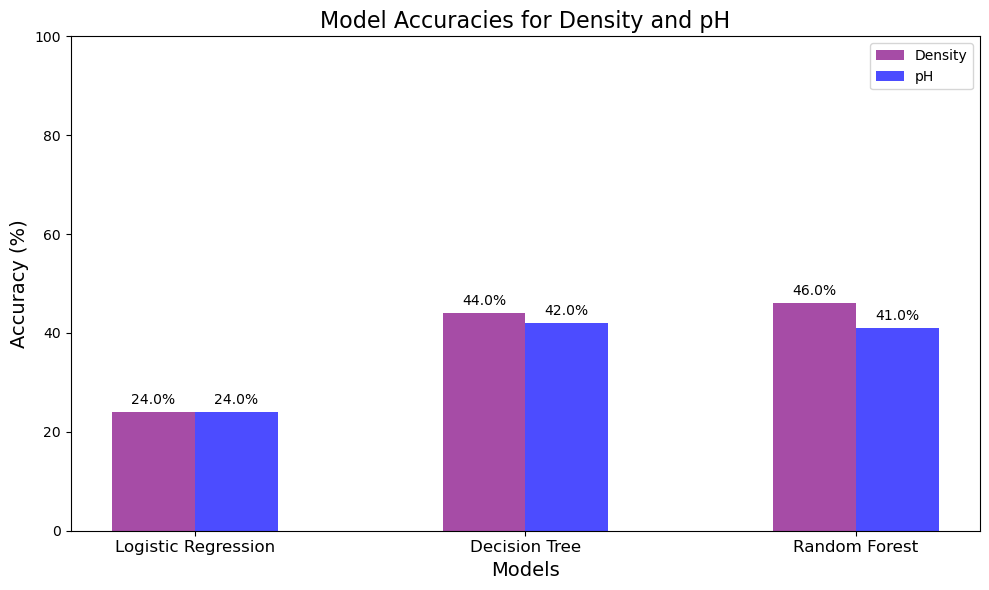

In [13]:
#Add plot of accuracies for both density and pH

# Aggregate density and pH accuracy values into this notebook.
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']
density_accuracies = [0.24, 0.44, 0.46]
ph_accuracies = [0.24, 0.42, 0.41]

# Converting to percentages
density_accuracies_percent = [acc * 100 for acc in density_accuracies]
ph_accuracies_percent = [acc * 100 for acc in ph_accuracies]

# Bar width and positions
x = np.arange(len(model_names))
width = 0.25

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width/2, density_accuracies_percent, width, label='Density', color='purple', alpha=0.7)
bar2 = ax.bar(x + width/2, ph_accuracies_percent, width, label='pH', color='blue', alpha=0.7)

# Add labels, title, and legend
ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('Accuracy (%)', fontsize=14)
ax.set_title('Model Accuracies for Density and pH', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(model_names, fontsize=12)
ax.set_ylim(0, 100)
ax.legend()

# Add accuracies as values
for bar in bar1:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f"{bar.get_height():.1f}%",
            ha='center', va='bottom', fontsize=10)
for bar in bar2:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f"{bar.get_height():.1f}%",
            ha='center', va='bottom', fontsize=10)

# Save the plot
plt.savefig('Density_pH Accuracies.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()